In [1]:
import math

import jupyter_cadquery as jcq
from jupyter_cadquery.replay import show

from build123d import *

Overwriting auto display for cadquery Workplane and Shape


In [2]:
jcq.set_defaults(
    control="orbit",
    axes=True,
    axes0=True,
    grid=(True, False, False),
    glass=True,
    theme="browser",
)

In [3]:
%%html
<style>
/* Fix widget background color in VS Code */
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
</style>

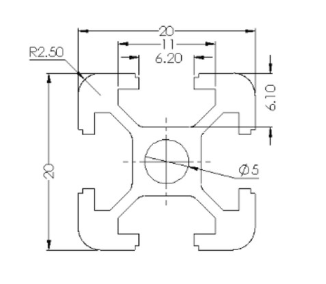

In [4]:
length = 320
thickness = 0.5
mount_hole_spacing = 8
mount_hole_r = 3/2
mount_hole_head_r = 6/2
mount_thickness = 2

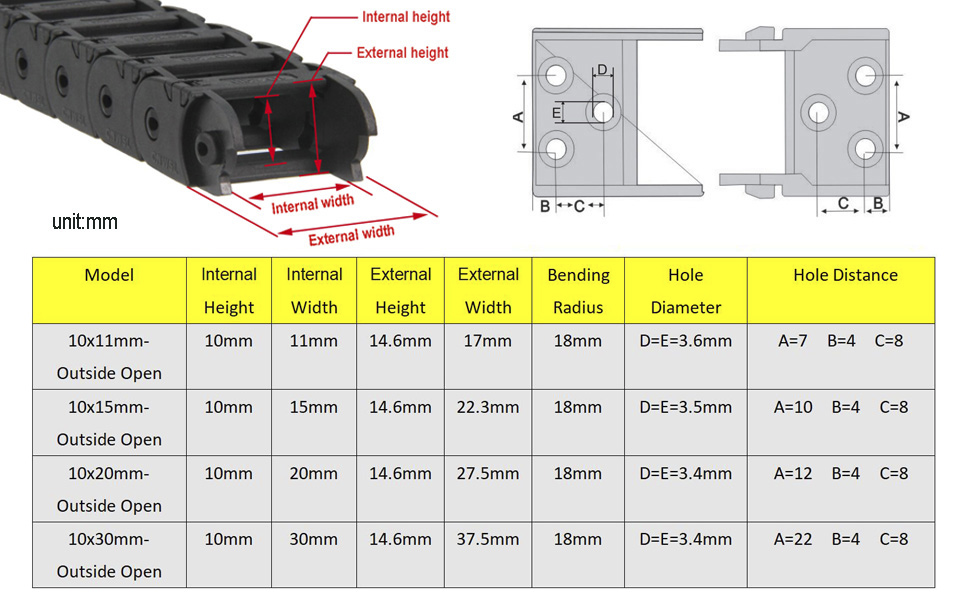

In [5]:
three_hole_a = 7
three_hole_b = 4
three_hole_c = 8

with BuildPart() as three_hole_mount:
    Box(20, 20, 20, align=(Align.CENTER,Align.CENTER,Align.MAX))
    with Locations((0, mount_thickness/2, -mount_thickness)):
        Box(20, 20-mount_thickness, 20 - mount_thickness*2, align=(Align.CENTER, Align.CENTER, Align.MAX), mode=Mode.SUBTRACT)
    with Locations((20/2-three_hole_b, 0, -20+mount_thickness)):
        with Locations((-three_hole_c, 0), (0, three_hole_a/2), (0, -three_hole_a/2)):
            CounterSinkHole(mount_hole_r, mount_hole_head_r)

show(three_hole_mount)
three_hole_mount.part.export_step("/tmp/x.step")

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/x.step(1355 ents)  Write  Done


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>

In [6]:
with BuildPart() as mount:
    Box(20, 20, mount_thickness, align=(Align.CENTER, Align.CENTER, Align.MIN))
    with Locations(mount.faces().sort_by(Axis.Z).last):
        Box(20, 6, 1.5, align=(Align.CENTER, Align.CENTER, Align.MIN))
    with Locations(mount.faces().sort_by(Axis.Z).first):
        with Locations((mount_hole_spacing/2, 0), (-mount_hole_spacing/2, 0)):
            CounterSinkHole(mount_hole_r, mount_hole_head_r)

show(mount)
mount.part.export_step("/tmp/x.step")

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/x.step(940 ents)  Write  Done


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>

In [7]:
with BuildPart() as body:
    Box(length-20*2, 20, thickness, align=(Align.CENTER,Align.CENTER,Align.MIN))
    with Locations((-(length/2-20/2), 0)):
        add(mount.part)
    with Locations((length/2-20/2, 0, thickness)):
        add(three_hole_mount.part)

show(body)
body.part.export_step("/tmp/drag_chain.step")

CadViewerWidget(anchor=None, cad_width=800, glass=True, height=600, pinning=False, theme='browser', title=None…


*******************************************************************
******        Statistics on Transfer (Write)                 ******


<IFSelect_ReturnStatus.IFSelect_RetDone: 1>


*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 0                      ******
** WorkSession : Sending all data
 Step File Name : /tmp/drag_chain.step(2257 ents)  Write  Done
